In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import sys

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    confusion_matrix, roc_auc_score
)


C:\Users\shant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\seaborn\_statistics.py:32: UserWarning: A NumPy version >=1.23.5 and <2.3.0 is required for this version of SciPy (detected version 2.3.1)
  from scipy.stats import gaussian_kde


In [3]:
import os

current_directory = os.getcwd()
print("Current Directory*************************", current_directory)
df = pd.read_csv("data/marketing_campaign.csv", sep='\t' )
df.head()



Current Directory************************* C:\Users\shant\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\Scripts\customer-ml-project


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [17]:
missing_income_rows = df[df['Income'].isnull()]
missing_income_rows

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,...,6,0,0,0,0,0,0,3,11,0


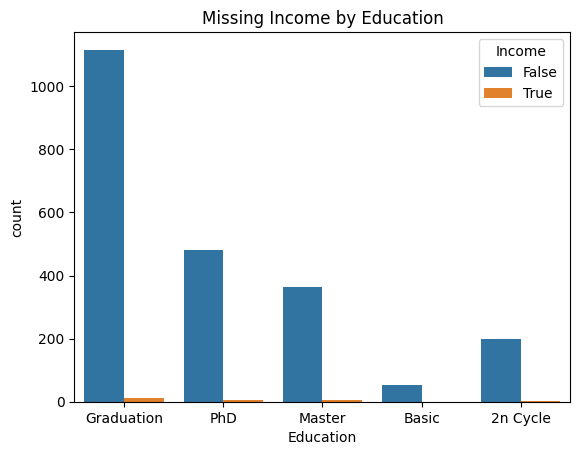

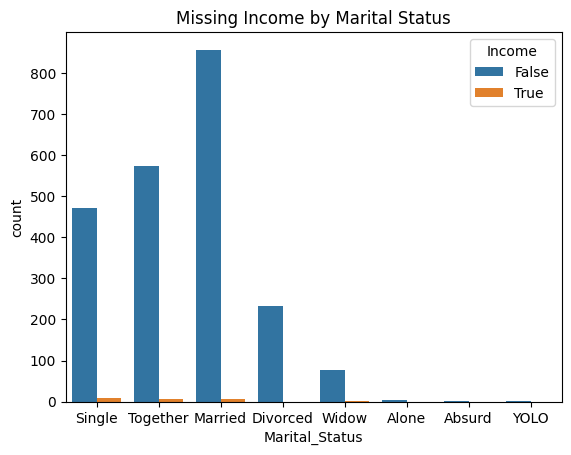

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare Education distribution for missing vs non-missing Income
sns.countplot(x='Education', hue=df['Income'].isnull(), data=df)
plt.title('Missing Income by Education')
plt.show()

# Compare Marital Status
sns.countplot(x='Marital_Status', hue=df['Income'].isnull(), data=df)
plt.title('Missing Income by Marital Status')
plt.show()



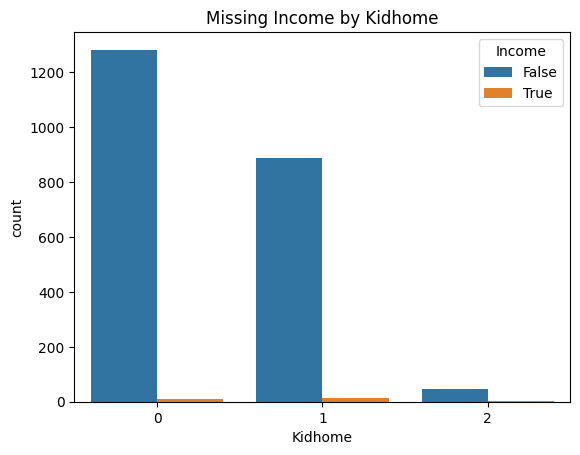

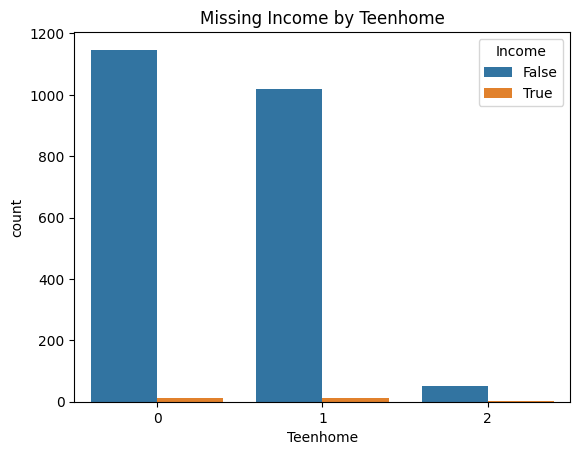

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare Education distribution for missing vs non-missing Income
sns.countplot(x='Kidhome', hue=df['Income'].isnull(), data=df)
plt.title('Missing Income by Kidhome')
plt.show()

# Compare Marital Status
sns.countplot(x='Teenhome', hue=df['Income'].isnull(), data=df)
plt.title('Missing Income by Teenhome')
plt.show()



In [ ]:
"""
Pattern:
•	There is no obvious demographic or behavioral pattern to the missing Income values.
•	Missing values appear randomly across education, age, marital status, spending, and tenure.
Implication:
•	Safe to assume these are Missing Completely At Random (MCAR)
•	Filling them with median income is appropriate and will not introduce bias.
"""

In [6]:

df['Income'].fillna(df['Income'].median(), inplace=True)

#df['Income'] = df['Income'].method(median()) 

#df.method({'Income': median()}, inplace=True)
df.isnull().sum()

C:\Users\shant\AppData\Local\Temp\ipykernel_23560\3677091101.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income'].fillna(df['Income'].median(), inplace=True)


ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [8]:
#Featured Engineering

#Convert birth year → age.

df['Age'] = 2026 - df['Year_Birth']

#Total spending:

spend_cols = [
    'MntWines','MntFruits','MntMeatProducts',
    'MntFishProducts','MntSweetProducts','MntGoldProds'
]
df['TotalSpend'] = df[spend_cols].sum(axis=1)

In [ ]:
'''
“For clustering and tree-based models, I used label encoding for simplicity.
For linear models, I switched to one-hot encoding to avoid introducing artificial ordinal relationships.”
'''


In [11]:

#Encode Categorial Variable

label_cols = ['Education', 'Marital_Status']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

#Responsible AI note:
#Label encoding imposes order — acknowledge this limitation


In [12]:
# Outlier Handling (Light Touch)

#I am removing extreme income values so my model learns from typical customers, not rare edge cases.

df = df[df['Income'] < df['Income'].quantile(0.99)]

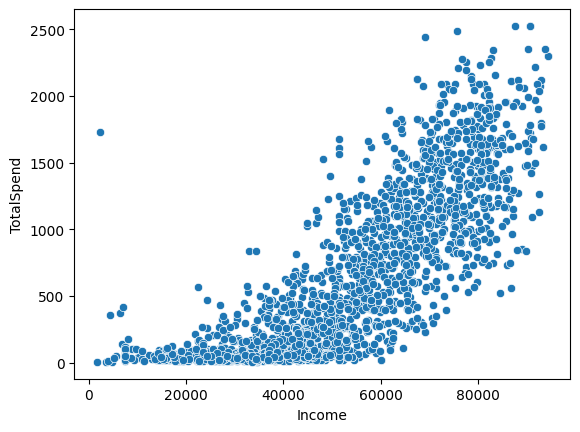

In [13]:
#Exploratory Data Analysis (EDA)

#Visual 1: Income vs Spend

sns.scatterplot(x='Income', y='TotalSpend', data=df)
plt.show()


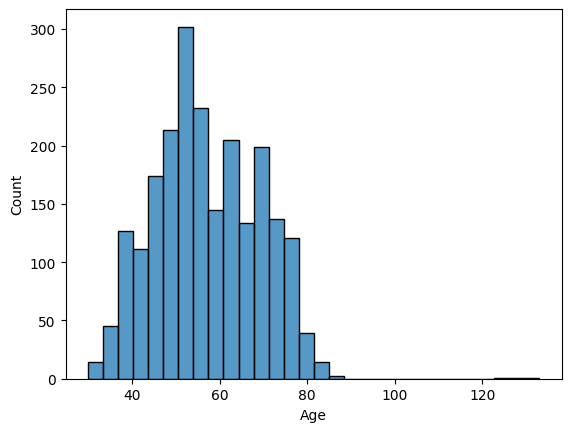

In [14]:
#Visual 2: Age Distribution

sns.histplot(df['Age'], bins=30)
plt.show()

In [15]:
#Visual 3: Campaign Response

df['Response'].value_counts(normalize=True)


Response
0    0.853857
1    0.146143
Name: proportion, dtype: float64

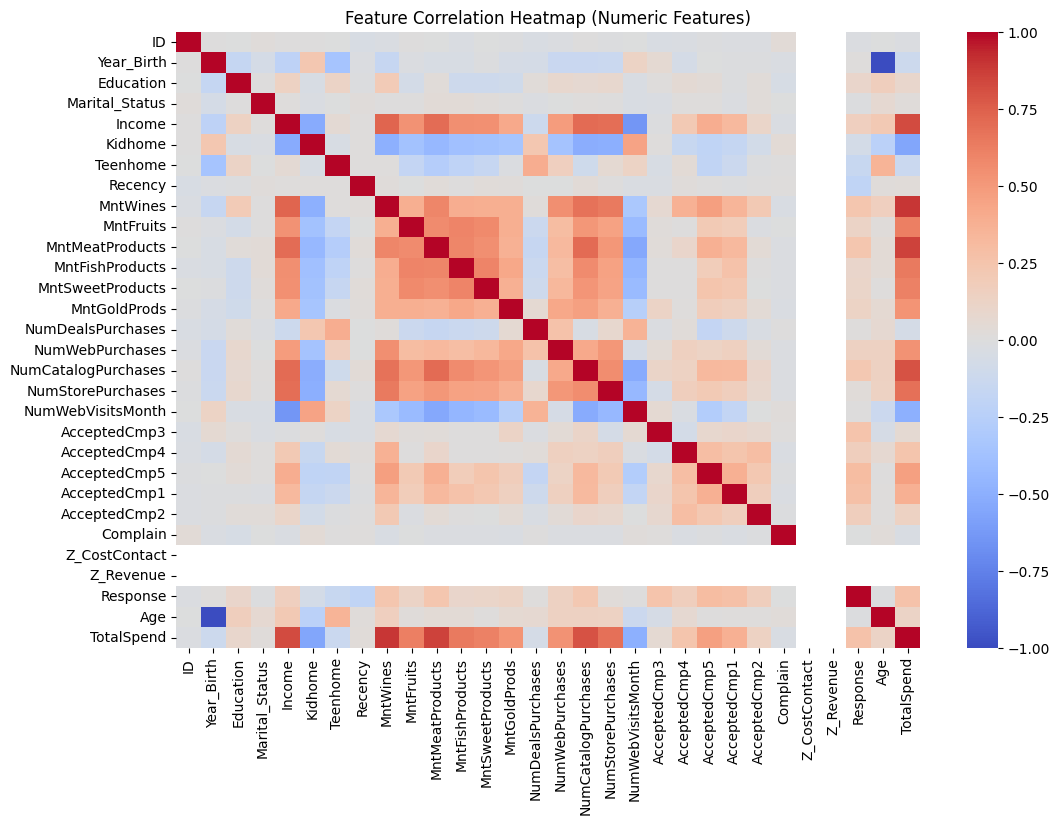

In [17]:
#ADVANCED EDA PLOT: Correlation Heatmap

numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), cmap='coolwarm', annot=False)
plt.title("Feature Correlation Heatmap (Numeric Features)")
plt.show()


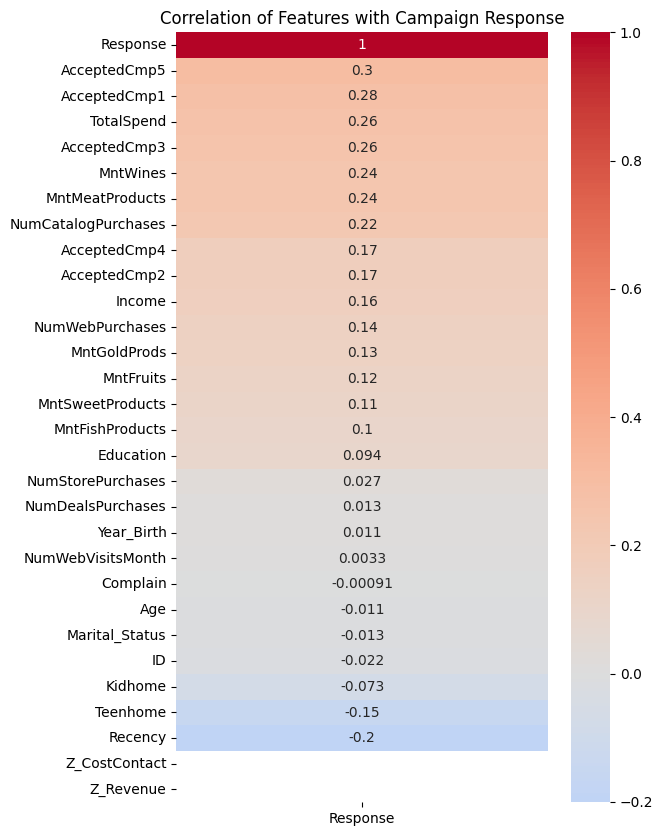

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include='number')

response_corr = numeric_df.corr()[['Response']].sort_values(
    by='Response',
    ascending=False
)
response_corr.head()


plt.figure(figsize=(6, 10))
sns.heatmap(
    response_corr,
    annot=True,
    cmap='coolwarm',
    center=0
)
plt.title("Correlation of Features with Campaign Response")
plt.show()


In [20]:
# Select Features for Clustering
cluster_features = df[['Income', 'Age', 'TotalSpend', 'NumWebPurchases']]
# Scale the Data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)


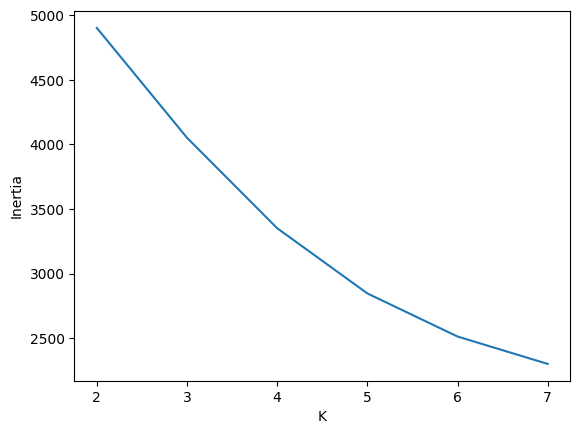

,Income,Age,TotalSpend,NumWebPurchases
Cluster,,,,
0,60274.378254,65.505360,783.528331,6.712098
1,34970.552412,53.906308,116.567718,2.168831
2,75502.622428,53.469136,1423.288066,4.759259


In [25]:
# Find Optimal K (Elbow Method)
inertia = []

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 8), inertia)
plt.xlabel("K")
plt.ylabel("Inertia")
plt.show()

# Train Final K-Means Model
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Evaluate Clustering
silhouette_score(scaled_features, df['Cluster'])

#State that silhouette > 0.5 is decent, not perfect.

#Interpret Clusters
df.groupby('Cluster')[['Income','Age','TotalSpend', 'NumWebPurchases']].mean()
#Name the clusters in markdown.
#This is non-negotiable.


In [27]:
# 7.Supervised Learning: Predict Campaign Response

X = df.drop(columns=['Response'])
y = df['Response']
#7.2 Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [33]:
# 1. All features numeric
print("Data Types:", X_train.dtypes)

# 2. No missing values
print("Missing values:", X_train.isnull().sum().sum(), y_train.isnull().sum())

# 3. Correct shape
print("Correct Shape:", X_train.shape, y_train.shape)

# 4. Target numeric
print("Target: ", y_train.unique())


Data Types: ID                       int64
Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Age                      int64
TotalSpend               int64
Cluster                  int32
dtype: object
Missing value

In [43]:
print("Train columns:", X_train.columns.tolist())
print("Test columns :", X_test.columns.tolist())


Train columns: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age', 'TotalSpend']
Test columns : ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age', 'TotalSpend']


In [48]:
# If you just want a numeric representation (e.g., days since some reference date)
X_train['Dt_Customer'] = pd.to_datetime(X_train['Dt_Customer'], errors='coerce')
X_test['Dt_Customer']  = pd.to_datetime(X_test['Dt_Customer'], errors='coerce')

# Convert to number of days since earliest customer date
min_date = X_train['Dt_Customer'].min()
X_train['Dt_Customer'] = (X_train['Dt_Customer'] - min_date).dt.days
X_test['Dt_Customer']  = (X_test['Dt_Customer'] - min_date).dt.days

X_train['Dt_Customer'] = X_train['Dt_Customer'].fillna(0)
X_test['Dt_Customer']  = X_test['Dt_Customer'].fillna(0)

print(X_train.dtypes)
print(X_test.dtypes)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)



ID                       int64
Year_Birth               int64
Education                int64
Marital_Status           int64
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer              int64
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Age                      int64
TotalSpend               int64
dtype: object
ID                       int64
Year_Birth               

In [64]:
log_model = LogisticRegression(solver='saga', max_iter=10000)
log_model.fit(X_train, y_train)

# Keep X_test as DataFrame with same column names

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
y_pred = log_model.predict(X_test_scaled)



#Evaluate
accuracy_score(y_test, y_pred)
precision_score(y_test, y_pred)
recall_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)
roc_auc_score(y_test, y_pred)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("Confusion:", confusion_matrix(y_test, y_pred))
print("Roc: ", roc_auc_score(y_test, y_pred))

Accuracy: 0.6283783783783784
Precision: 0.25961538461538464
Recall: 0.8307692307692308
Confusion: [[225 154]
 [ 11  54]]
Roc:  0.7122183884716867


In [60]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)



#Evaluate
accuracy_score(y_test, rf_pred)
precision_score(y_test, rf_pred)
recall_score(y_test, rf_pred)


print("Accuracy:", accuracy_score(y_test, rf_pred))
print("Precision:", precision_score(y_test, rf_pred))
print("Recall:", recall_score(y_test, rf_pred))

Accuracy: 0.8828828828828829
Precision: 0.76
Recall: 0.2923076923076923
